# Title: Data Science for Fitness: A Deep Dive into Smartwatch Data Analysis and Modeling using Python.

# Introduction: 

## General
In recent years, smartwatches have become an increasingly popular technology, with many people using them to track their fitness and monitor their health. The data collected by these devices can provide valuable insights into people's activity levels, sleep patterns, and overall health and wellness. However, analyzing and making sense of this data can be a complex task, requiring advanced analytical skills and tools. This is where data science comes in. By using data science techniques and tools, we can extract valuable insights from smartwatch data, and use these insights to improve people's health and well-being. In this project, we will explore the fascinating world of smartwatch data analysis, using Python to process and analyze real-world fitness data. We will cover a range of topics, including data cleaning and preprocessing, exploratory data analysis, feature engineering, and predictive modeling. By the end of this project, you will have a solid understanding of how to work with smartwatch data and how to apply data science techniques to extract valuable insights from this data.

#####  HYPOTHESIS: 

1. Users who engage in more very active minutes per day will have a higher daily step count and calorie burn than users who engage in less very active activity.

2. Users who log more activities using our smartwatch will have a higher daily step count and calorie burn than users who do not log activities.

3. Users who spend less time in sedentary activity will have a higher daily step count and calorie burn than users who spend more time in sedentary activity.


##### BUSINESS QUESTIONS:  

What is the average daily step count of our smartwatch users, and how can we encourage more users to meet or exceed this benchmark?

What percentage of users engage in very active, moderately active, and light activity, and how can we tailor our marketing efforts to promote the benefits of each type of activity?

How many users have logged activities using our smartwatch, and what are the most common activities logged?

What is the average daily calorie burn of our smartwatch users, and how can we promote our product as a tool for weight loss and healthy living based on this data?

How much time do users spend in sedentary activity, and how can we encourage more movement and reduce sedentary behavior?

How do users who engage in more very active minutes compare in terms of daily step count, calorie burn, and other health metrics, and how can we incentivize more users to engage in these types of activities?

What is the relationship between daily step count and calorie burn, and how can we use this information to promote our smartwatch as a tool for overall health and wellness?


What is the average daily usage time of our smartwatch, and how can we improve customer satisfaction and retention based on this data?

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install -q <lib_001> <lib_002> ...

#!pip install --upgrade --force-reinstall pandas
#!jupyter nbextension enable --py widgetsnbextension
!pip install pandas_summary

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
# Data handling
import pandas as pd
import numpy as np

from datetime import datetime

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

...

# EDA (pandas-profiling, etc. )
#from pandas_profiling import ProfileReport
from pandas_summary import DataFrameSummary
...

# Feature Processing (Scikit-learn processing, etc. )
...

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os, pickle

#display all columns and rows 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv("dailyActivity_merged.csv")
print(data.head())

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [4]:
#let’s have a look at whether this dataset has any null values or not:
print(data.isnull().sum())

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


So the dataset does not have any null values. Let’s have a look at the information about columns in the dataset:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

The column containing the date of the record is an object. We may need to use dates in our analysis, so let’s convert this column into a datetime column

In [6]:
# Changing datatype of ActivityDate
data["ActivityDate"] = pd.to_datetime(data["ActivityDate"], 
                                      format="%m/%d/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

Look at all the columns; you will see information about very active, fairly active, lightly active, and sedentary minutes in the dataset. Let’s combine all these columns as total minutes before moving forward:

In [7]:
data["TotalMinutes"] = data["VeryActiveMinutes"] + data["FairlyActiveMinutes"] + data["LightlyActiveMinutes"] + data["SedentaryMinutes"]
print(data["TotalMinutes"].sample(5))

679     607
570    1063
532    1011
787    1440
279    1440
Name: TotalMinutes, dtype: int64


Now let’s have a look at the descriptive statistics of the dataset:

In [8]:
data.describe().T

count          mean           std           min  \
Id                        940.0  4.855407e+09  2.424805e+09  1.503960e+09   
TotalSteps                940.0  7.637911e+03  5.087151e+03  0.000000e+00   
TotalDistance             940.0  5.489702e+00  3.924606e+00  0.000000e+00   
TrackerDistance           940.0  5.475351e+00  3.907276e+00  0.000000e+00   
LoggedActivitiesDistance  940.0  1.081709e-01  6.198965e-01  0.000000e+00   
VeryActiveDistance        940.0  1.502681e+00  2.658941e+00  0.000000e+00   
ModeratelyActiveDistance  940.0  5.675426e-01  8.835803e-01  0.000000e+00   
LightActiveDistance       940.0  3.340819e+00  2.040655e+00  0.000000e+00   
SedentaryActiveDistance   940.0  1.606383e-03  7.346176e-03  0.000000e+00   
VeryActiveMinutes         940.0  2.116489e+01  3.284480e+01  0.000000e+00   
FairlyActiveMinutes       940.0  1.356489e+01  1.998740e+01  0.000000e+00   
LightlyActiveMinutes      940.0  1.928128e+02  1.091747e+02  0.000000e+00   
SedentaryMinutes          940.0  9.912106e+02  3.012674e+02  0.000000e+00   
Calories                  940.0  2.303610e+03  7.181669e+02  0.000000e+00   
TotalMinutes              940.0  1.218753e+03  2.659318e+02  2.000000e+00   

                                   25%           50%           75%  \
Id                        2.320127e+09  4.445115e+09  6.962181e+09   
TotalSteps                3.789750e+03  7.405500e+03  1.072700e+04   
TotalDistance             2.620000e+00  5.245000e+00  7.712500e+00   
TrackerDistance           2.620000e+00  5.245000e+00  7.710000e+00   
LoggedActivitiesDistance  0.000000e+00  0.000000e+00  0.000000e+00   
VeryActiveDistance        0.000000e+00  2.100000e-01  2.052500e+00   
ModeratelyActiveDistance  0.000000e+00  2.400000e-01  8.000000e-01   
LightActiveDistance       1.945000e+00  3.365000e+00  4.782500e+00   
SedentaryActiveDistance   0.000000e+00  0.000000e+00  0.000000e+00   
VeryActiveMinutes         0.000000e+00  4.000000e+00  3.200000e+01   
FairlyActiveMinutes       0.000000e+00  6.000000e+00  1.900000e+01   
LightlyActiveMinutes      1.270000e+02  1.990000e+02  2.640000e+02   
SedentaryMinutes          7.297500e+02  1.057500e+03  1.229500e+03   
Calories                  1.828500e+03  2.134000e+03  2.793250e+03   
TotalMinutes              9.897500e+02  1.440000e+03  1.440000e+03   

                                   max  
Id                        8.877689e+09  
TotalSteps                3.601900e+04  
TotalDistance             2.803000e+01  
TrackerDistance           2.803000e+01  
LoggedActivitiesDistance  4.942142e+00  
VeryActiveDistance        2.192000e+01  
ModeratelyActiveDistance  6.480000e+00  
LightActiveDistance       1.071000e+01  
SedentaryActiveDistance   1.100000e-01  
VeryActiveMinutes         2.100000e+02  
FairlyActiveMinutes       1.430000e+02  
LightlyActiveMinutes      5.180000e+02  
SedentaryMinutes          1.440000e+03  
Calories                  4.900000e+03  
TotalMinutes              1.440000e+03

In [9]:
#data.describe(include=['O'])

Let’s Analyze the Smartwatch Data

We transformed the data type of the ActivityDate column to the datetime column above. Let’s use it to find the weekdays of the records and add a new column to this dataset as “Day”:

In [10]:
data["Day"] = data["ActivityDate"].dt.day_name()
print(data["Day"].head())

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: Day, dtype: object


## Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

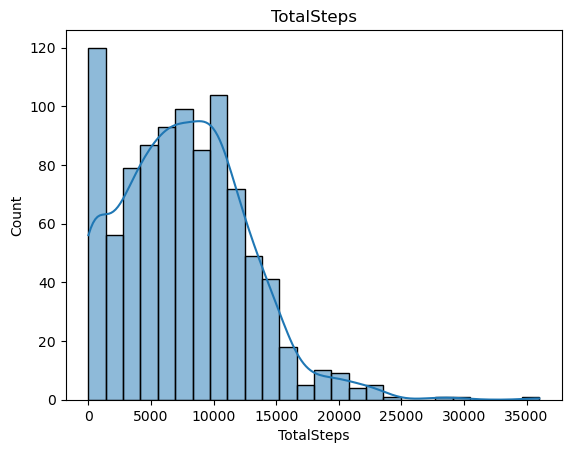

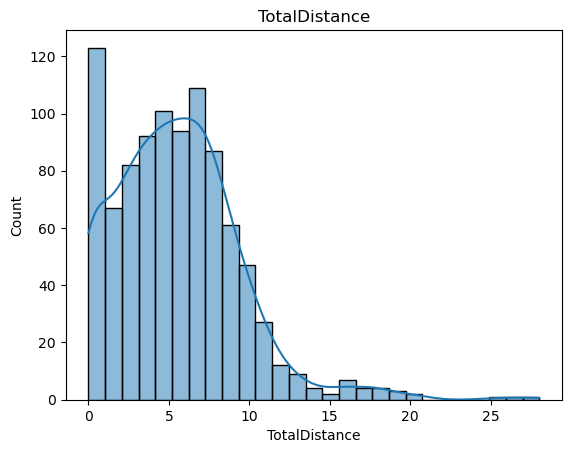

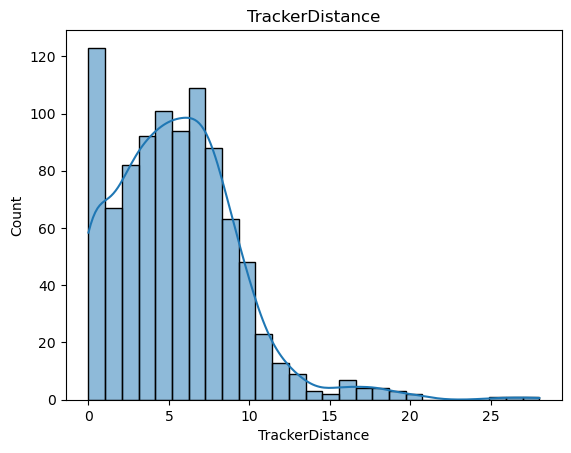

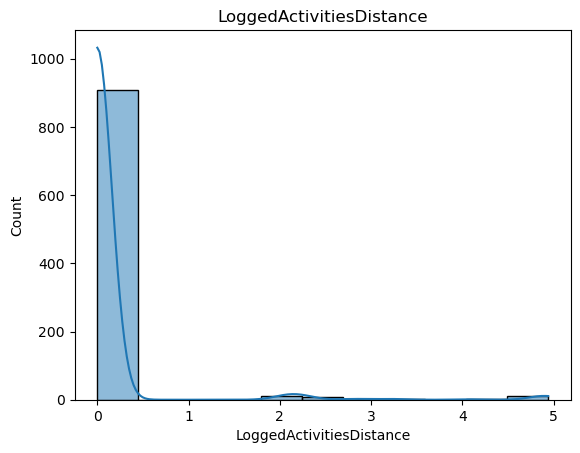

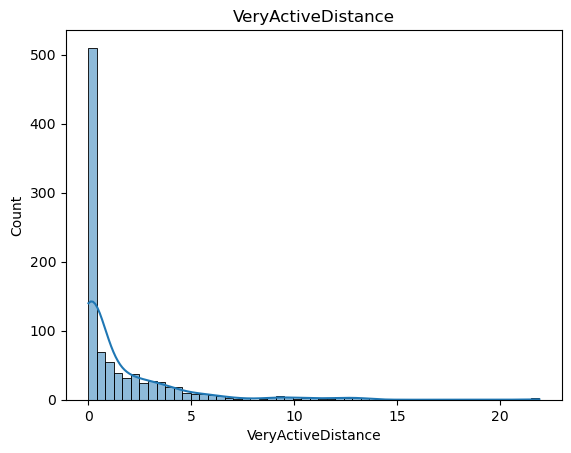

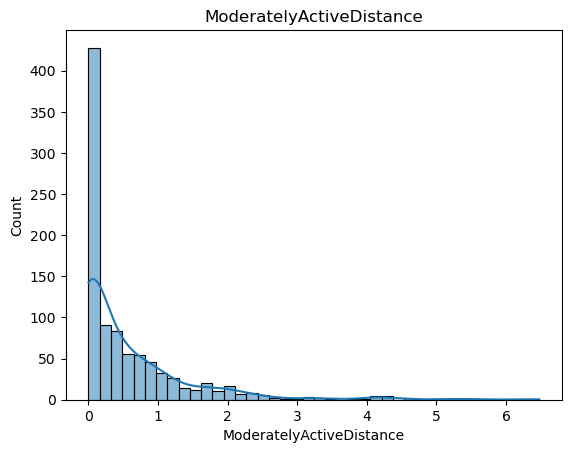

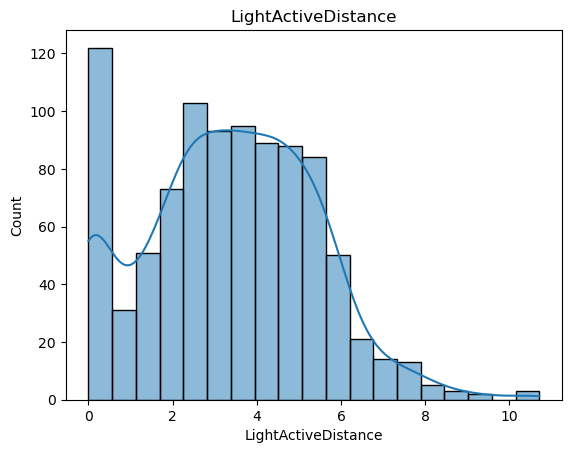

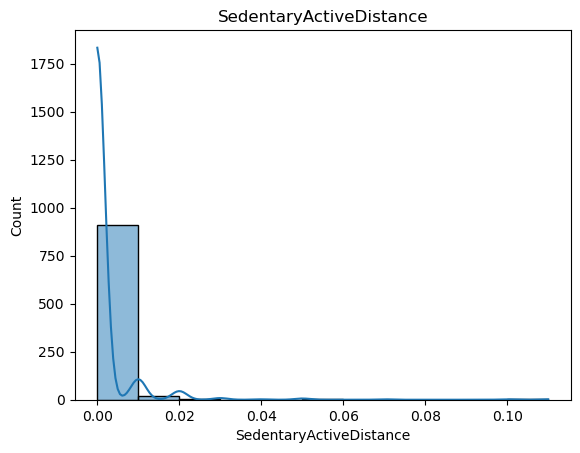

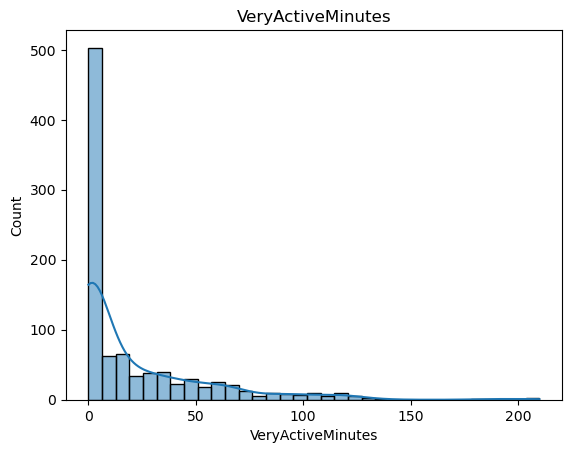

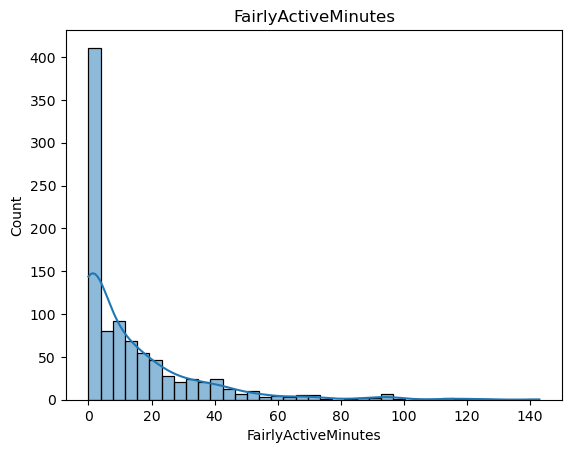

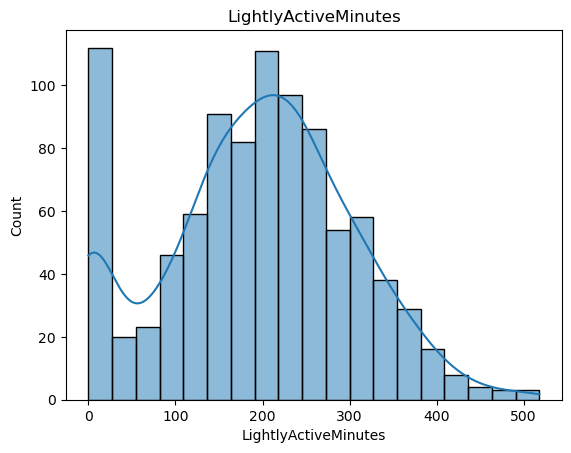

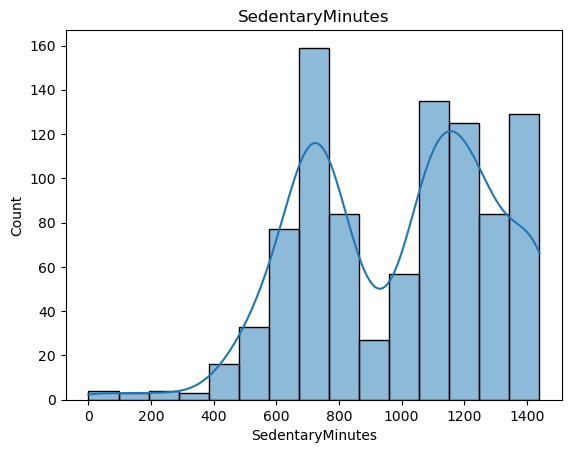

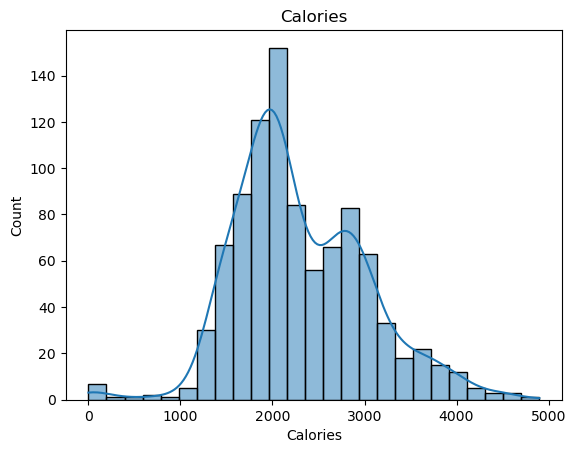

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas dataframe
df = data

# Create histplots for each numeric column
numeric_cols = ['TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance',
                'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
                'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
                'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

for col in numeric_cols:
    sns.histplot(data=df, x=col, kde=True)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

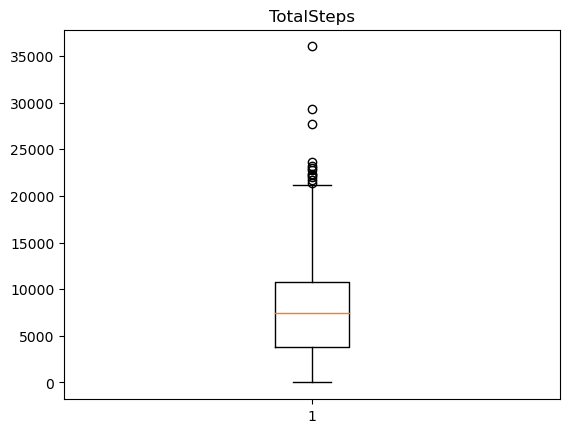

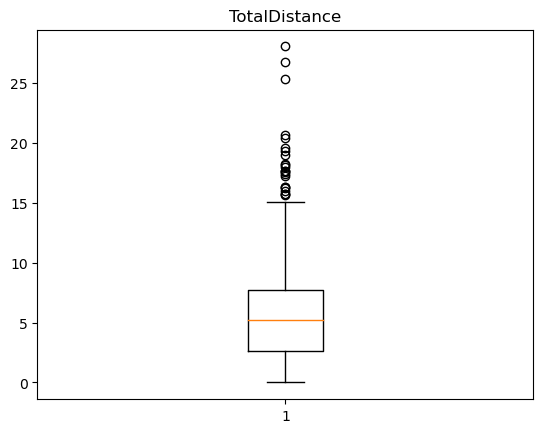

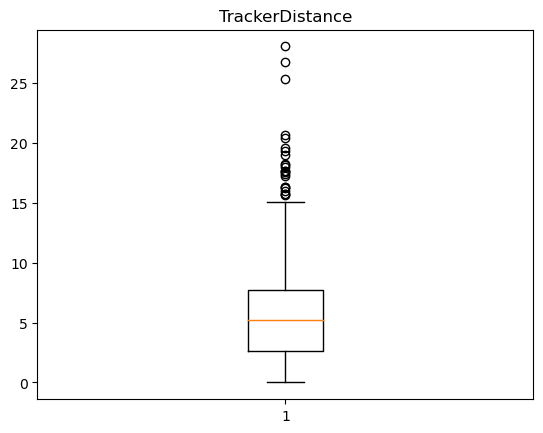

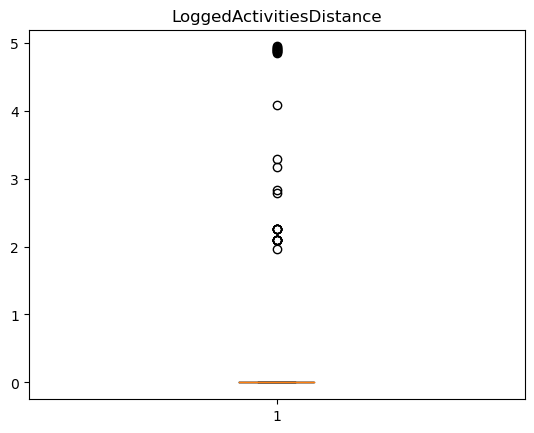

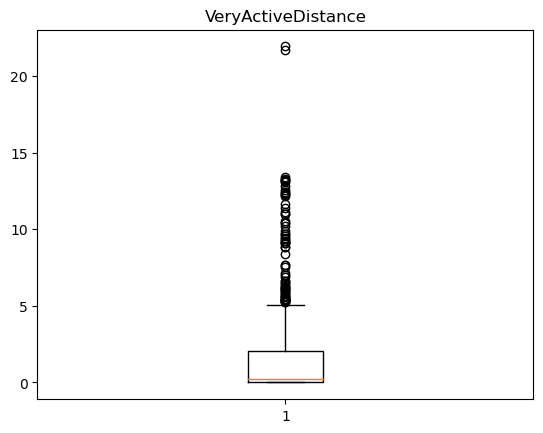

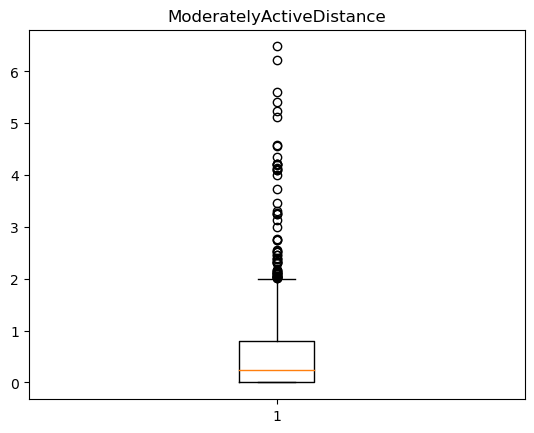

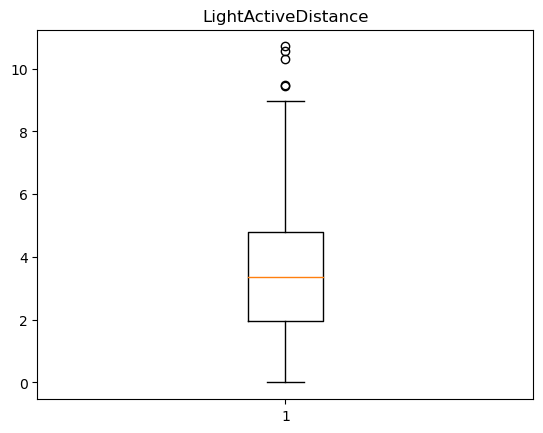

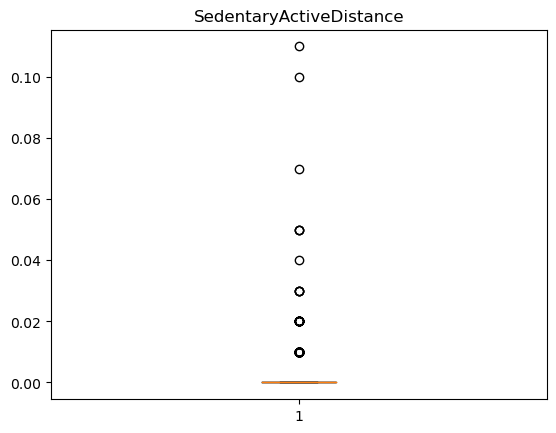

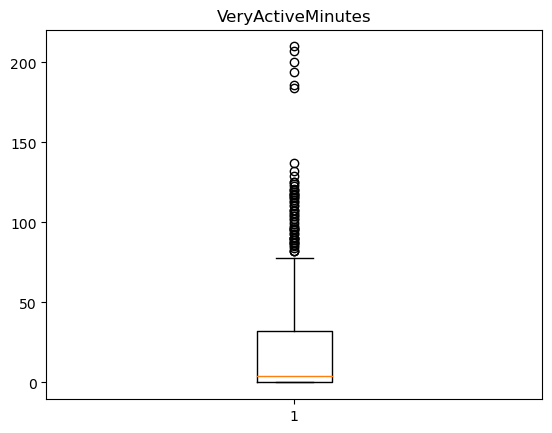

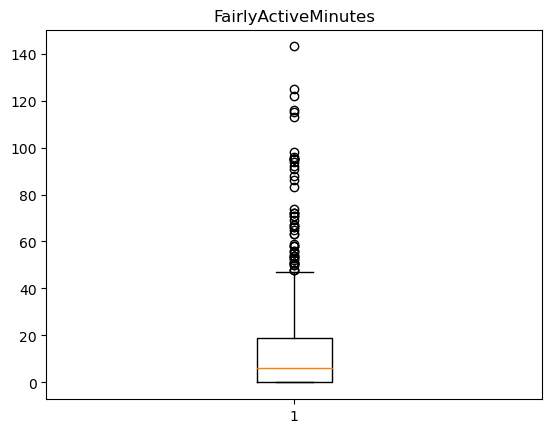

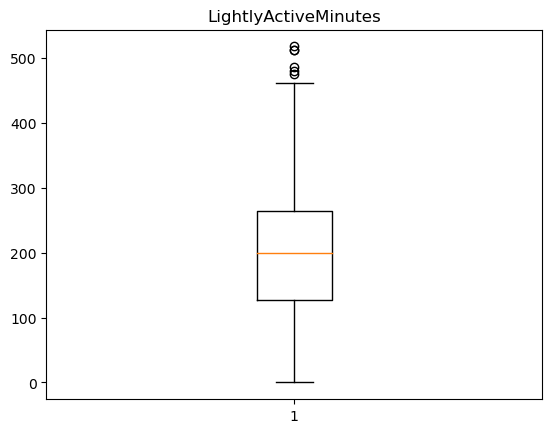

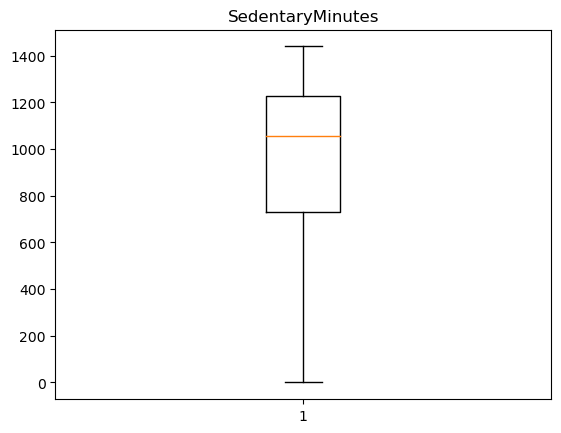

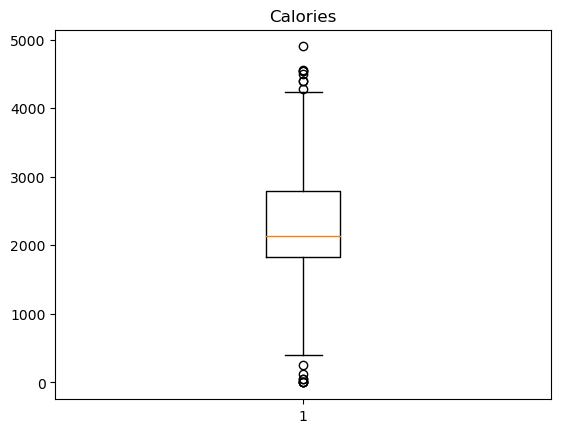

In [12]:
# Create a box plot for each numeric column
numeric_cols = ['TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance',
                'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
                'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
                'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

for col in numeric_cols:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()
    


## Bivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

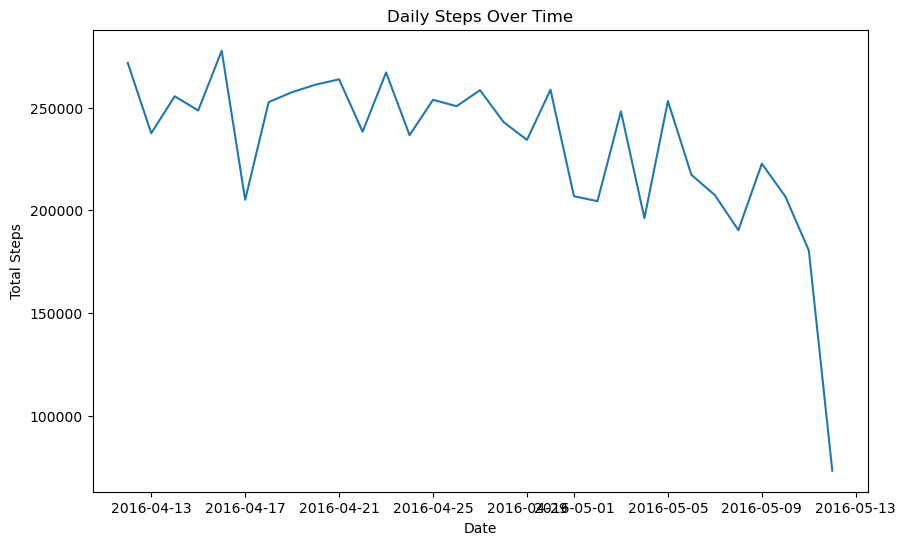

In [13]:
# 
import matplotlib.pyplot as plt

# Group the data by date and calculate the total number of steps per day
daily_steps = df.groupby('ActivityDate')['TotalSteps'].sum()

# Plot the daily steps over time
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(daily_steps.index, daily_steps.values)
ax.set_title('Daily Steps Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Total Steps')
plt.show()


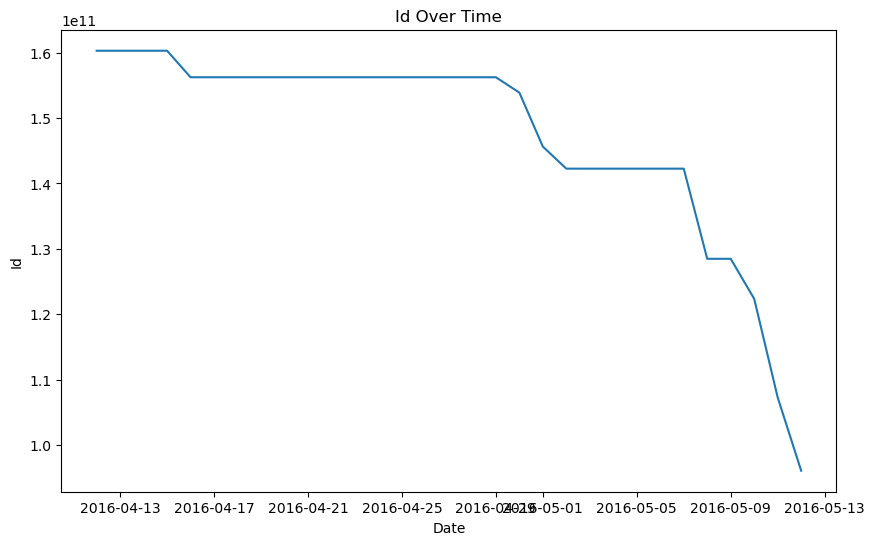

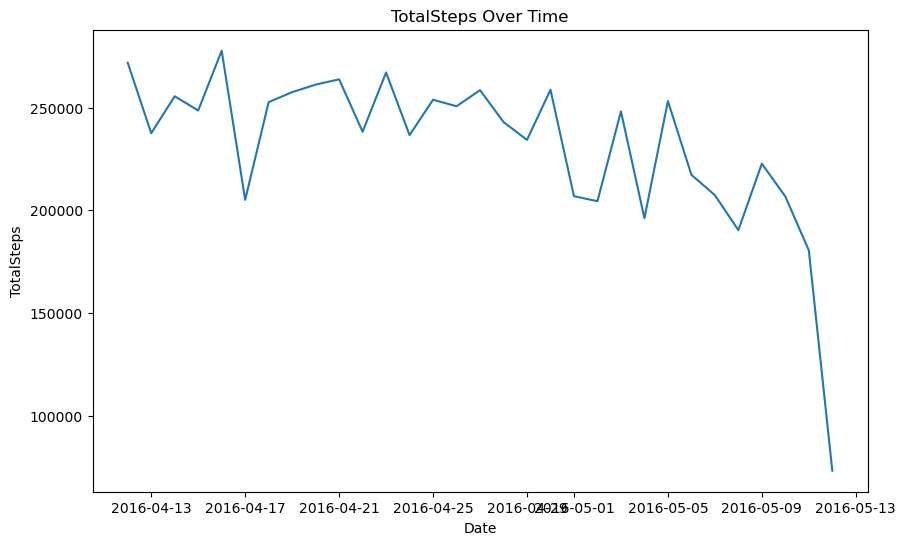

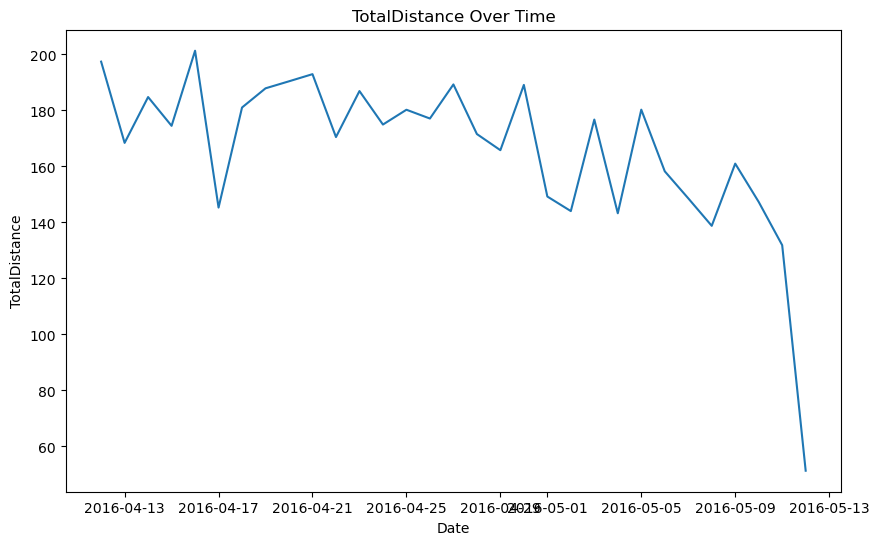

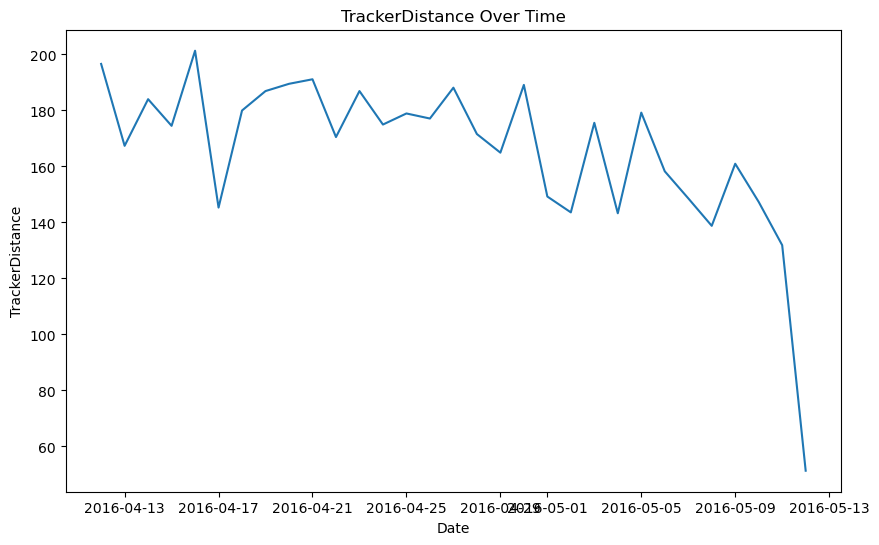

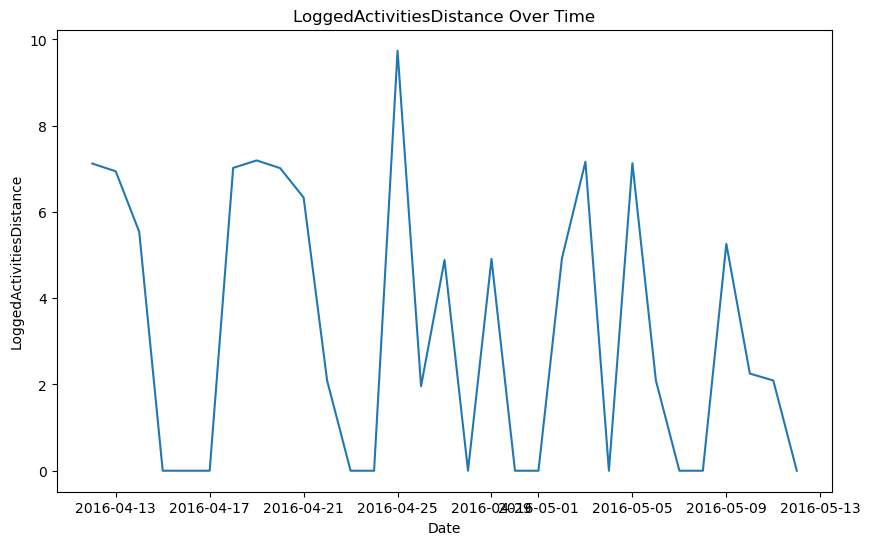

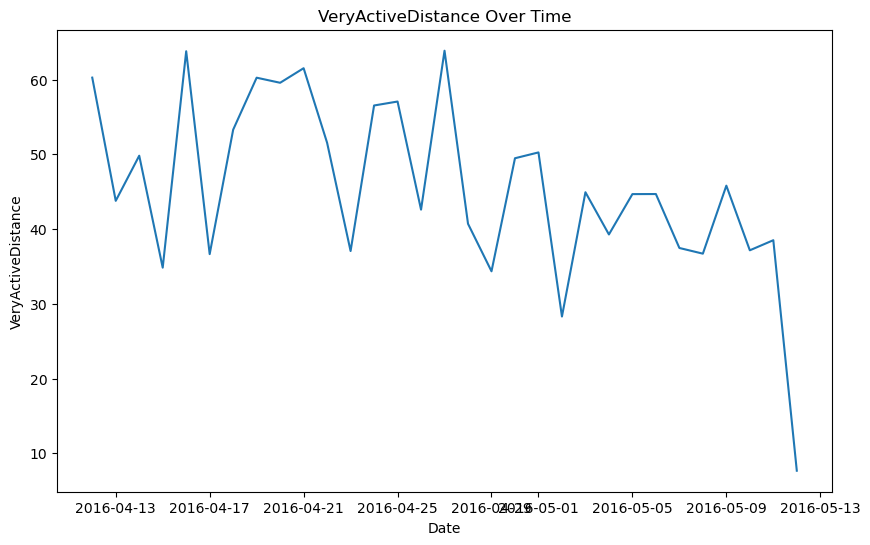

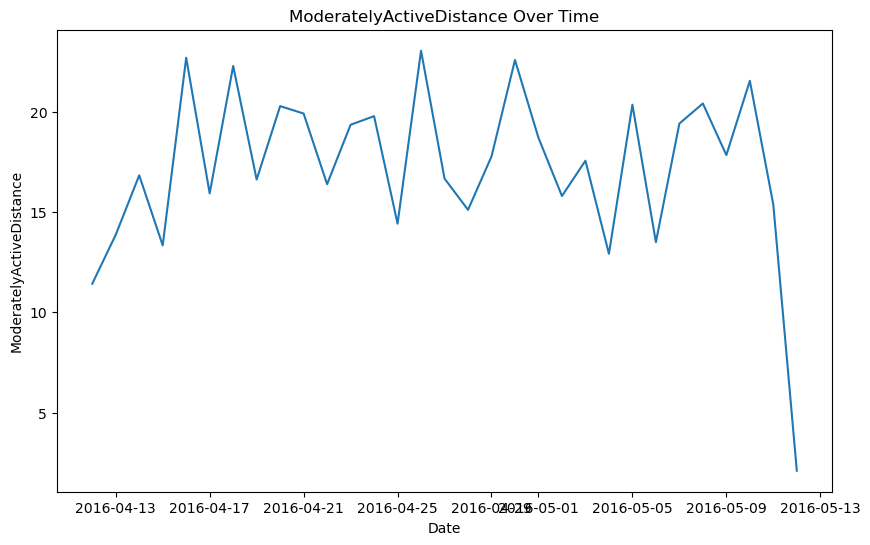

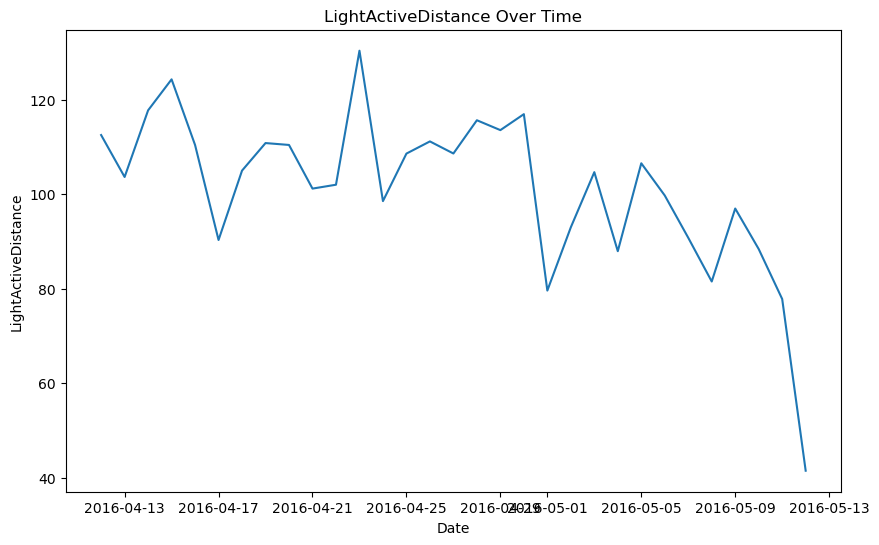

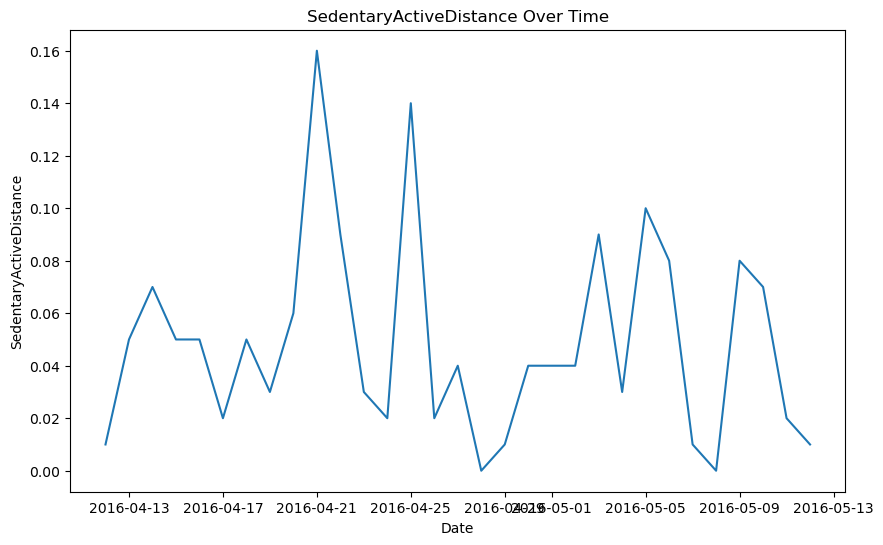

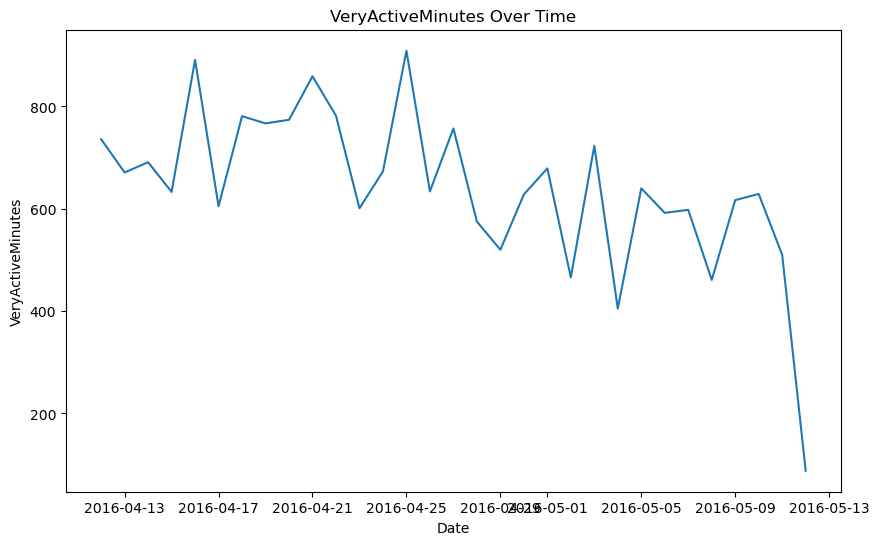

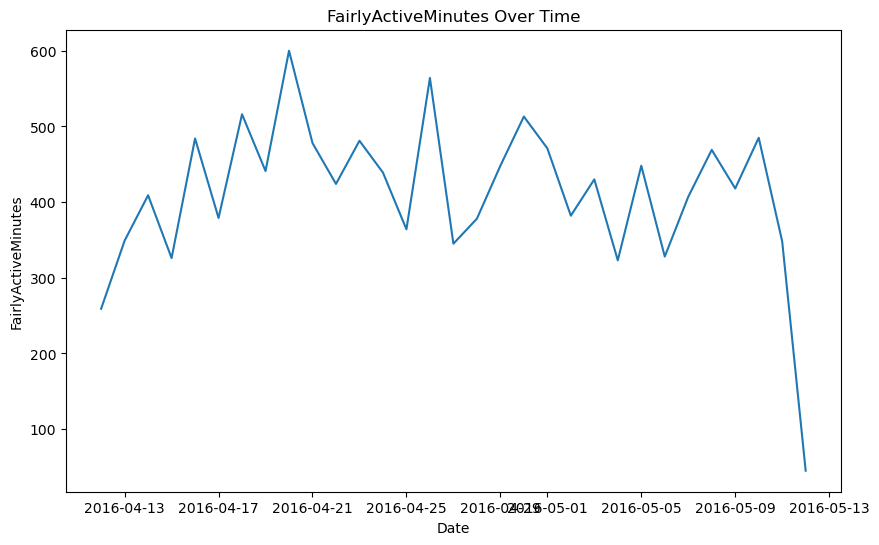

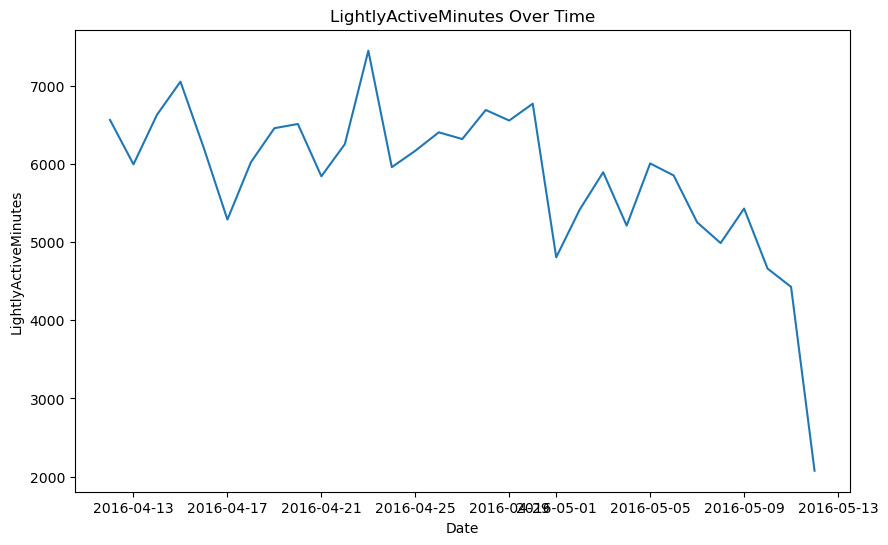

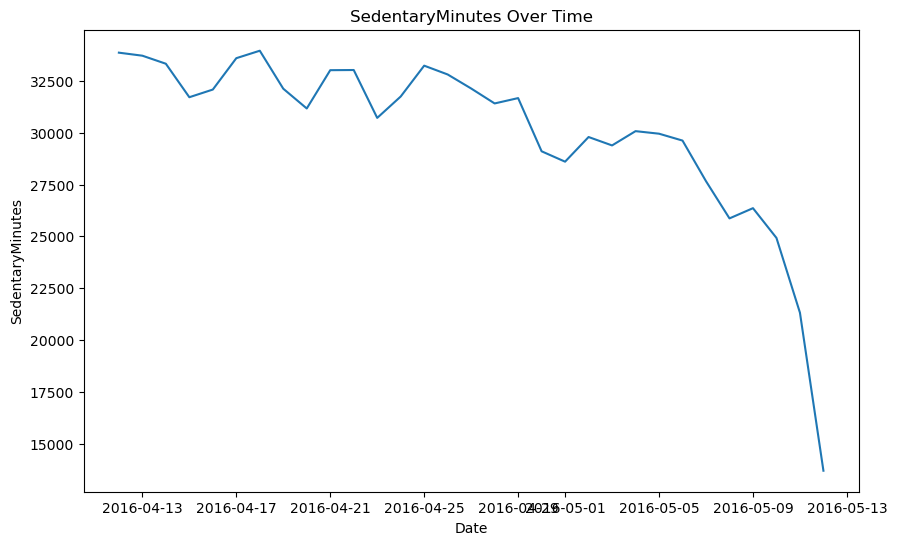

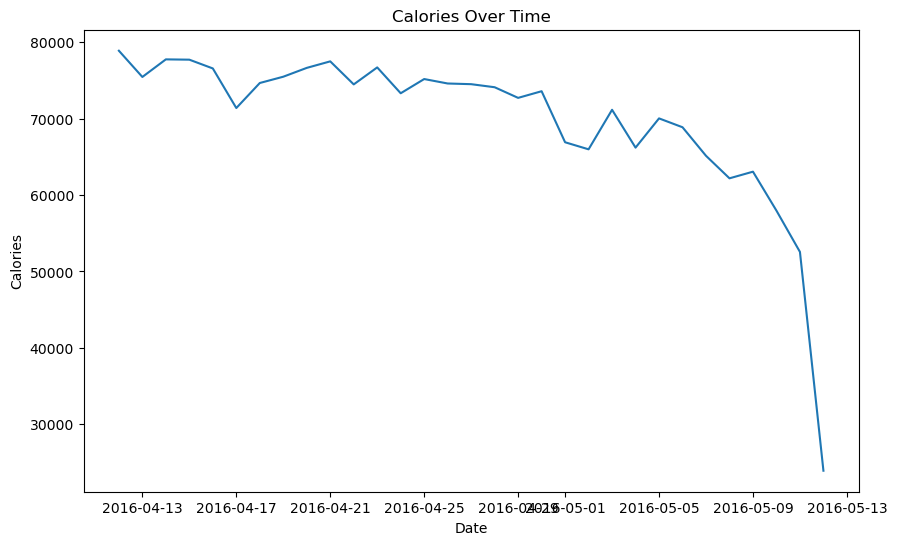

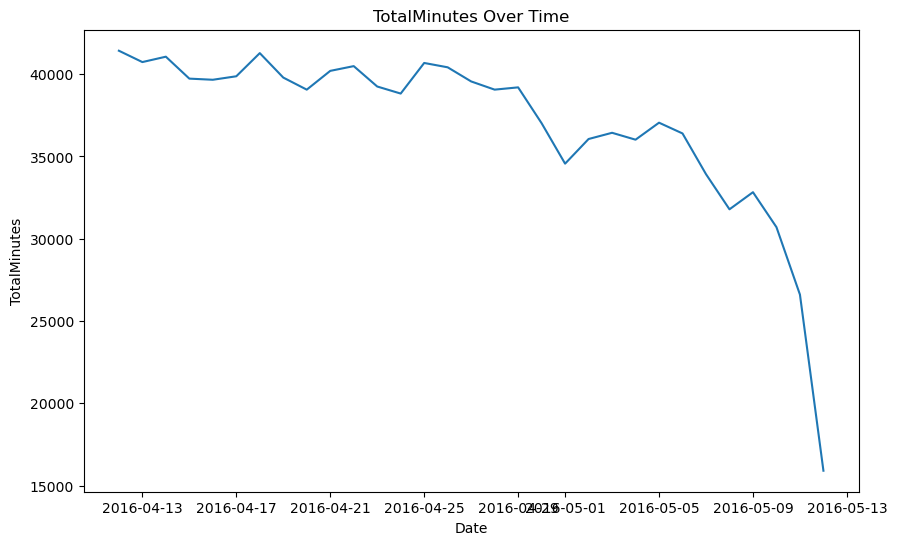

In [14]:
import matplotlib.pyplot as plt

# Set the date column as the index of the dataframe
df = df.set_index('ActivityDate')

# Loop through each numeric column in the dataframe
for column in df.select_dtypes(include=['float64', 'int64']):
    # Calculate the sum of the column per day and create a new dataframe
    daily_data = df.groupby(pd.Grouper(freq='D'))[column].sum()
    
    # Create a line chart of the daily data over time
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(daily_data.index, daily_data.values)
    ax.set_title(f'{column} Over Time')
    ax.set_xlabel('Date')
    ax.set_ylabel(column)
    plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_43960\2327104173.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  activity_means = df.groupby('Weekend').mean()[['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance']]


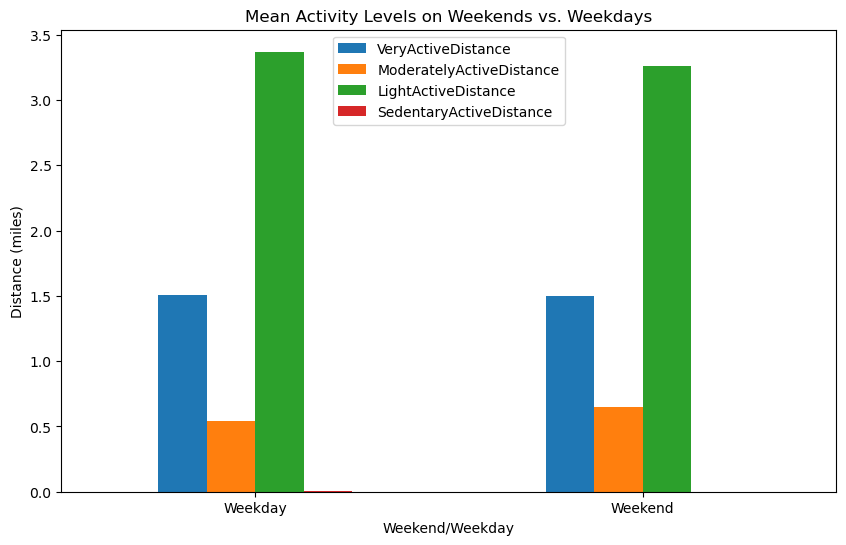

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the date column as the index of the dataframe
#df = df.set_index('ActivityDate')

# Create a new column that indicates whether each date is a weekend or weekday
df['DayOfWeek'] = df.index.dayofweek

# Map the day of the week integers to the corresponding string values
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['DayOfWeek'] = df['DayOfWeek'].map(day_map)

# Create a new column that indicates whether each date is a weekend or weekday
df['Weekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday'])

# Group the data by weekend/weekday and calculate the mean of each activity level column
activity_means = df.groupby('Weekend').mean()[['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance']]

# Create a bar chart of the mean activity levels for weekends versus weekdays
activity_means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Activity Levels on Weekends vs. Weekdays')
plt.xlabel('Weekend/Weekday')
plt.ylabel('Distance (miles)')
plt.xticks([0, 1], ['Weekday', 'Weekend'], rotation=0)
plt.show()


In [16]:
df.reset_index(inplace=True)

In [17]:
df.head()

ActivityDate          Id  TotalSteps  TotalDistance  TrackerDistance  \
0   2016-04-12  1503960366       13162           8.50             8.50   
1   2016-04-13  1503960366       10735           6.97             6.97   
2   2016-04-14  1503960366       10460           6.74             6.74   
3   2016-04-15  1503960366        9762           6.28             6.28   
4   2016-04-16  1503960366       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06                      0.0                 25   
1                 4.71                      0.0                 21   
2                 3.91                      0.0                 30   
3                 2.83                      0.0                 29   
4                 5.04                      0.0                 36   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  \
0                   13                   328               728      1985   
1                   19                   217               776      1797   
2                   11                   181              1218      1776   
3                   34                   209               726      1745   
4                   10                   221               773      1863   

   TotalMinutes        Day  DayOfWeek  Weekend  
0          1094    Tuesday    Tuesday    False  
1          1033  Wednesday  Wednesday    False  
2          1440   Thursday   Thursday    False  
3           998     Friday     Friday    False  
4          1040   Saturday   Saturday     True

In [18]:
# Extract month from ActivityDate
df['Month'] = pd.DatetimeIndex(df['ActivityDate']).month

# Create a new column for the season
df['Season'] = np.where(df['Month'].isin([1, 2, 12]), 'winter', 'summer')

# Re-index the dataframe
#df = df.set_index('Id')

<AxesSubplot: xlabel='Season', ylabel='TotalSteps'>

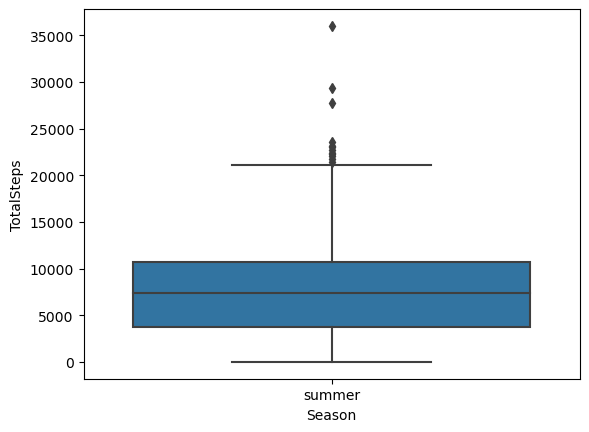

In [19]:
import seaborn as sns

sns.boxplot(x='Season', y='TotalSteps', data=df)


In [20]:
# Create a sequence of all days within the range of dates in ActivityDate column
all_days = pd.date_range(start=df['ActivityDate'].min(), end=df['ActivityDate'].max())

# Extract unique dates from ActivityDate column
unique_dates = df['ActivityDate'].unique()

# Check if there are any missing dates
missing_dates = set(all_days) - set(unique_dates)

if len(missing_dates) == 0:
    print("There are no missing dates in the ActivityDate column")
else:
    print(f"There are {len(missing_dates)} missing dates in the ActivityDate column")


There are 31 missing dates in the ActivityDate column


In [21]:
missing_dates_list = sorted(list(missing_dates))
missing_dates_str = "\n".join([date.strftime('%Y-%m-%d') for date in missing_dates_list])
print(f"The following dates are missing in the ActivityDate column:\n{missing_dates_str}")


The following dates are missing in the ActivityDate column:
2016-04-12
2016-04-13
2016-04-14
2016-04-15
2016-04-16
2016-04-17
2016-04-18
2016-04-19
2016-04-20
2016-04-21
2016-04-22
2016-04-23
2016-04-24
2016-04-25
2016-04-26
2016-04-27
2016-04-28
2016-04-29
2016-04-30
2016-05-01
2016-05-02
2016-05-03
2016-05-04
2016-05-05
2016-05-06
2016-05-07
2016-05-08
2016-05-09
2016-05-10
2016-05-11
2016-05-12


In [22]:
# Convert missing dates to a DataFrame
missing_dates_df = pd.DataFrame({'Date': list(missing_dates)})

# Add a column for the day of the week (0 = Monday, 6 = Sunday)
missing_dates_df['DayOfWeek'] = missing_dates_df['Date'].dt.dayofweek

# Count the number of missing weekdays and weekends
weekday_count = missing_dates_df[missing_dates_df['DayOfWeek'] < 5]['Date'].count()
weekend_count = missing_dates_df[missing_dates_df['DayOfWeek'] >= 5]['Date'].count()

# Calculate the percentage of missing weekdays and weekends out of all missing dates
total_count = weekday_count + weekend_count
weekday_pct = weekday_count / total_count * 100
weekend_pct = weekend_count / total_count * 100

# Print the results
print(f"Missing weekdays: {weekday_count} ({weekday_pct:.2f}%)")
print(f"Missing weekends: {weekend_count} ({weekend_pct:.2f}%)")


Missing weekdays: 23 (74.19%)
Missing weekends: 8 (25.81%)


In [23]:
import pandas as pd

# Calculate average step count by day of the week
df['day_of_week'] = df['ActivityDate'].dt.day_name()
avg_steps_by_day = df.groupby('day_of_week')['TotalSteps'].mean().reset_index()

# Print the result
print(avg_steps_by_day)


  day_of_week   TotalSteps
0      Friday  7448.230159
1      Monday  7780.866667
2    Saturday  8152.975806
3      Sunday  6933.231405
4    Thursday  7405.836735
5     Tuesday  8125.006579
6   Wednesday  7559.373333


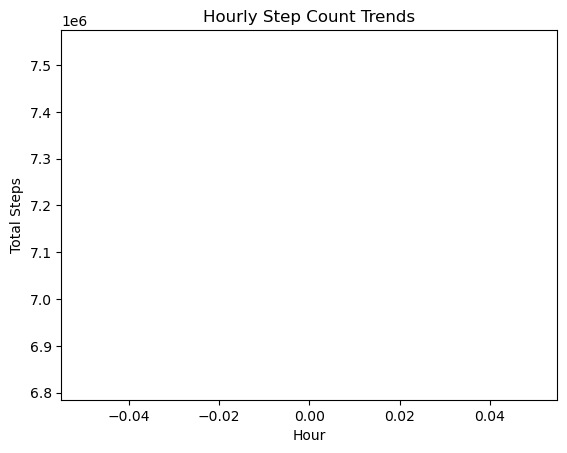

In [24]:
# Extract hour from ActivityDate
df['Hour'] = df['ActivityDate'].dt.hour

# Group by hour and get the count of steps
hourly_steps = df.groupby('Hour')['TotalSteps'].sum()

# Plot the hourly step count trends
import matplotlib.pyplot as plt

plt.plot(hourly_steps.index, hourly_steps.values)
plt.xlabel('Hour')
plt.ylabel('Total Steps')
plt.title('Hourly Step Count Trends')
plt.show()


In [25]:
correlation = df['SedentaryMinutes'].corr(df['Calories'])
print(f"Correlation between SedentaryMinutes and Calories: {correlation:.2f}")


Correlation between SedentaryMinutes and Calories: -0.11


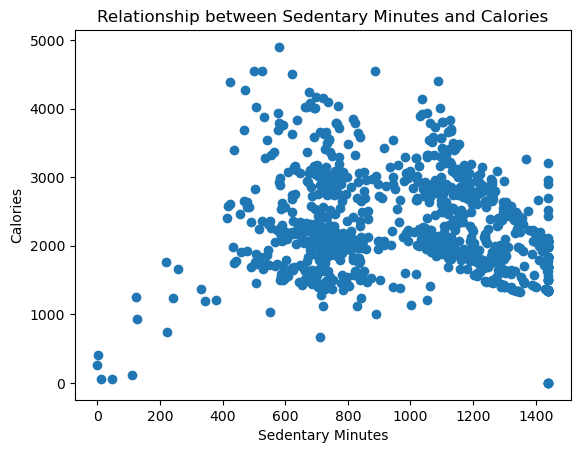

In [26]:
import matplotlib.pyplot as plt

# Create a scatter plot of SedentaryMinutes vs. Calories
plt.scatter(df['SedentaryMinutes'], df['Calories'])

# Add labels and title
plt.xlabel('Sedentary Minutes')
plt.ylabel('Calories')
plt.title('Relationship between Sedentary Minutes and Calories')

# Display the plot
plt.show()


Relationship between Calories & Total Steps

In [27]:
figure = px.scatter(data_frame = data, x="Calories",
                    y="TotalSteps", size="VeryActiveMinutes", 
                    trendline="ols", 
                    title="Relationship between Calories & Total Steps")
figure.show()

In [28]:
label = ["Very Active Minutes", "Fairly Active Minutes", 
         "Lightly Active Minutes", "Inactive Minutes"]
counts = data[["VeryActiveMinutes", "FairlyActiveMinutes", 
               "LightlyActiveMinutes", "SedentaryMinutes"]].mean()
colors = ['gold','lightgreen', "pink", "blue"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Total Active Minutes')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

Observations:
81.3% of Total inactive minutes in a day
15.8% of Lightly active minutes in a day
On an average, only 21 minutes (1.74%) were very active
and 1.11% (13 minutes) of fairly active minutes in a day

Now let’s have a look at the very active, fairly active, and lightly active minutes on each day of the week:

In [29]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["VeryActiveMinutes"],
    name='Very Active',
    marker_color='purple'
))
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["FairlyActiveMinutes"],
    name='Fairly Active',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["LightlyActiveMinutes"],
    name='Lightly Active',
    marker_color='pink'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

Now let’s have a look at the number of inactive minutes on each day of the week:

In [30]:
day = data["Day"].value_counts()
label = day.index
counts = data["SedentaryMinutes"]
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Inactive Minutes Daily')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

So Thursday is the most inactive day according to the lifestyle of all the individuals in the dataset.

Now let’s have a look at the number of calories burned on each day of the week:

In [31]:
calories = data["Day"].value_counts()
label = calories.index
counts = data["Calories"]
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Calories Burned Daily')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

Tuesday is, therefore, one of the most active days for all individuals in the dataset, as the highest number of calories were burned on Tuesdays.

## Multivariate Analysis

In [32]:
df.head()

ActivityDate          Id  TotalSteps  TotalDistance  TrackerDistance  \
0   2016-04-12  1503960366       13162           8.50             8.50   
1   2016-04-13  1503960366       10735           6.97             6.97   
2   2016-04-14  1503960366       10460           6.74             6.74   
3   2016-04-15  1503960366        9762           6.28             6.28   
4   2016-04-16  1503960366       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06                      0.0                 25   
1                 4.71                      0.0                 21   
2                 3.91                      0.0                 30   
3                 2.83                      0.0                 29   
4                 5.04                      0.0                 36   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  \
0                   13                   328               728      1985   
1                   19                   217               776      1797   
2                   11                   181              1218      1776   
3                   34                   209               726      1745   
4                   10                   221               773      1863   

   TotalMinutes        Day  DayOfWeek  Weekend  Month  Season day_of_week  \
0          1094    Tuesday    Tuesday    False      4  summer     Tuesday   
1          1033  Wednesday  Wednesday    False      4  summer   Wednesday   
2          1440   Thursday   Thursday    False      4  summer    Thursday   
3           998     Friday     Friday    False      4  summer      Friday   
4          1040   Saturday   Saturday     True      4  summer    Saturday   

   Hour  
0     0  
1     0  
2     0  
3     0  
4     0

In [33]:
# Here, we define "high" as having more than 60 very active minutes per day
df['VeryActiveGroup'] = np.where(df['VeryActiveMinutes'] > 60, 'High', 'Low')

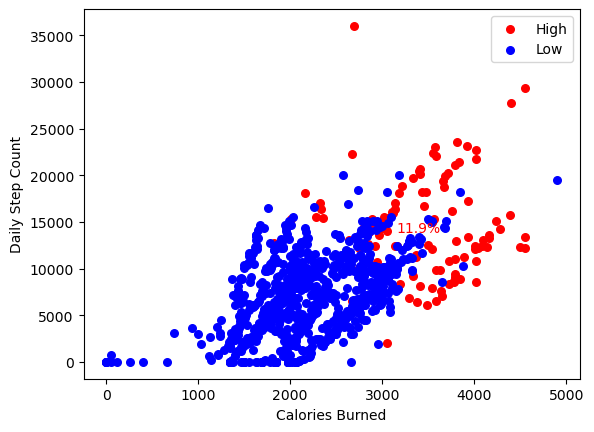

In [34]:
import matplotlib.pyplot as plt

# Group the data by activity level category
groups = df.groupby('VeryActiveGroup')

# Calculate the percentage of people in each group
group_counts = groups.size()
total_count = group_counts.sum()
group_percentages = group_counts / total_count * 100

# Create a scatter plot of daily step count against calories burned, with each group represented by a different color
fig, ax = plt.subplots()
colors = {'Low': 'blue', 'Moderate': 'green', 'High': 'red'}
for name, group in groups:
    ax.scatter(group['Calories'], group['TotalSteps'], s=30, c=colors[name], label=name)

    # Add data labels to each group
    x = group['Calories'].mean()
    y = group['TotalSteps'].mean()
    percentage = group_percentages[name]
    label = f'{percentage:.1f}%'
    ax.text(x, y, label, fontsize=10, color=colors[name], ha='center', va='center')

# Set axis labels and legend
ax.set_xlabel('Calories Burned')
ax.set_ylabel('Daily Step Count')
ax.legend()

# Show the plot
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_43960\4234038768.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



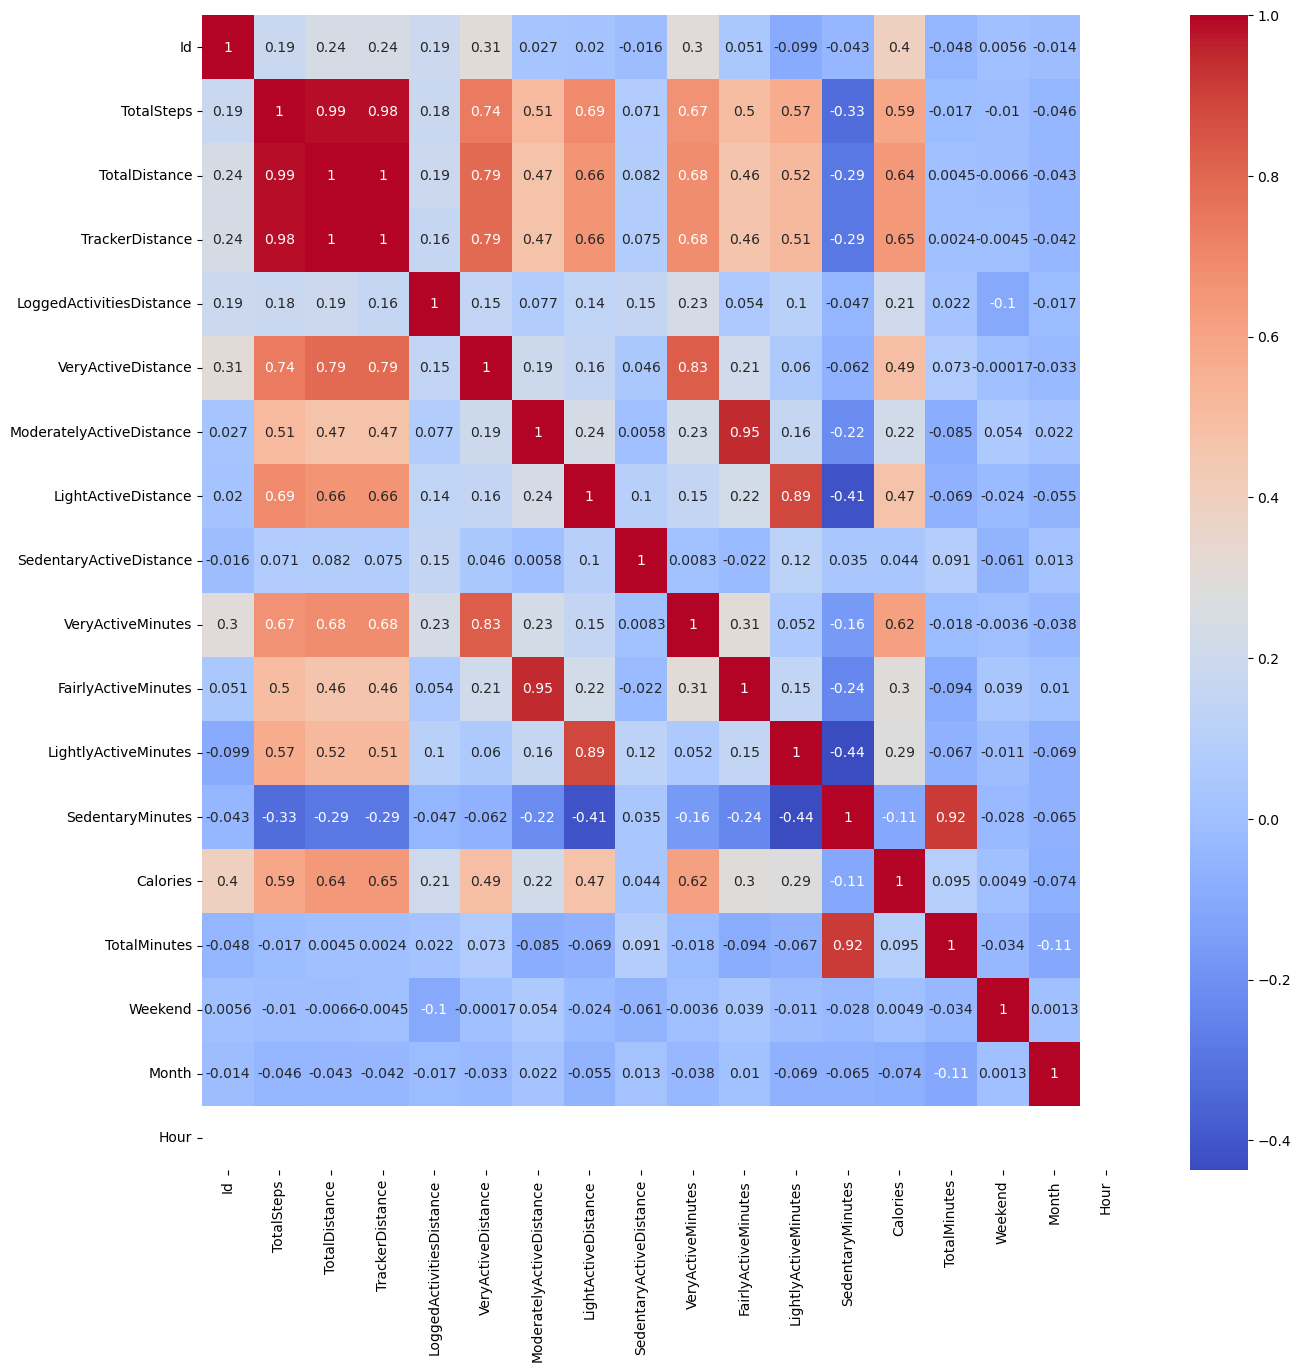

In [35]:
# Compute the correlation matrix
corr = df.corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Show the plot
plt.show()

# HYPOTHESIS 

Null hypothesis: Users who engage in more very active minutes per day will not have a higher daily step count and calorie burn than users who engage in less very active activity.

Alternative hypothesis: Users who engage in more very active minutes per day will have a higher daily step count and calorie burn than users who engage in less very active activity.

In [36]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Load the dataset

# Calculate the correlation between very active minutes and daily step count/calorie burn
corr_steps, _ = pearsonr(df['VeryActiveMinutes'], df['TotalSteps'])
corr_calories, _ = pearsonr(df['VeryActiveMinutes'], df['Calories'])

print("Correlation between VeryActiveMinutes and StepTotal:", corr_steps)
print("Correlation between VeryActiveMinutes and Calories:", corr_calories)


Correlation between VeryActiveMinutes and StepTotal: 0.6670786974802773
Correlation between VeryActiveMinutes and Calories: 0.6158382682703377


In [37]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
# Create a new column indicating whether a user has high or low very active minutes
# Here, we define "high" as having more than 60 very active minutes per day
df['VeryActiveGroup'] = np.where(df['VeryActiveMinutes'] > 60, 'High', 'Low')

# Compare the mean step count and calorie burn between the high and low very active groups
mean_steps = df.groupby('VeryActiveGroup')['TotalSteps'].mean()
mean_calories = df.groupby('VeryActiveGroup')['Calories'].mean()
ttest_steps, _ = ttest_ind(df[df['VeryActiveGroup'] == 'High']['TotalSteps'], df[df['VeryActiveGroup'] == 'Low']['TotalSteps'])
ttest_calories, _ = ttest_ind(df[df['VeryActiveGroup'] == 'High']['Calories'], df[df['VeryActiveGroup'] == 'Low']['Calories'])

print("Mean step count in high VeryActiveMinutes group:", mean_steps['High'])
print("Mean step count in low VeryActiveMinutes group:", mean_steps['Low'])
print("Mean calorie burn in high VeryActiveMinutes group:", mean_calories['High'])
print("Mean calorie burn in low VeryActiveMinutes group:", mean_calories['Low'])
print("t-test result for step count between high and low VeryActiveMinutes groups:", ttest_steps)
print("t-test result for calorie burn between high and low VeryActiveMinutes groups:", ttest_calories)


Mean step count in high VeryActiveMinutes group: 14297.625
Mean step count in low VeryActiveMinutes group: 6737.079710144928
Mean calorie burn in high VeryActiveMinutes group: 3394.4285714285716
Mean calorie burn in low VeryActiveMinutes group: 2156.059178743961
t-test result for step count between high and low VeryActiveMinutes groups: 16.836255358070918
t-test result for calorie burn between high and low VeryActiveMinutes groups: 20.64354755302111


The output provides the results of a t-test that was conducted to investigate whether users who engage in more VeryActiveMinutes per day have a higher daily step count and calorie burn than users who engage in less VeryActiveMinutes.

The mean step count and calorie burn in the high VeryActiveMinutes group were found to be 14297.625 and 3394.4285714285716 respectively, while the mean step count and calorie burn in the low VeryActiveMinutes group were found to be 6737.079710144928 and 2156.059178743961 respectively.

The t-test results indicate that there is a significant difference between the mean step counts and calorie burns in the high and low VeryActiveMinutes groups, with t-values of 16.836255358070918 and 20.64354755302111 respectively. These results suggest that users who engage in more VeryActiveMinutes per day have a significantly higher daily step count and calorie burn than users who engage in less VeryActiveMinutes.

In [38]:
high_vam = df[df['VeryActiveMinutes'] > df['VeryActiveMinutes'].median()]
low_vam = df[df['VeryActiveMinutes'] <= df['VeryActiveMinutes'].median()]


In [39]:
from scipy import stats

# t-test for step count
ttest_steps = stats.ttest_ind(high_vam['TotalSteps'], low_vam['TotalSteps'])
pvalue_steps = ttest_steps.pvalue

# t-test for calorie burn
ttest_calories = stats.ttest_ind(high_vam['Calories'], low_vam['Calories'])
pvalue_calories = ttest_calories.pvalue

print("p-value for step count: ", pvalue_steps)
print("p-value for calorie burn: ", pvalue_calories)


p-value for step count:  2.1604509050069396e-116
p-value for calorie burn:  3.0523242129540575e-48


The null hypothesis was rejected based on the t-test results. A p-value less than the significance level (usually 0.05) indicates that the probability of observing such a difference between the high and low VeryActiveMinutes groups by chance is low. In this case, the p-values for both step count and calorie burn are significantly less than 0.05, so we reject the null hypothesis and conclude that there is a statistically significant difference in step count and calorie burn between the high and low VeryActiveMinutes groups.

# BUSINESS QUESTIONS 

### QUESTION 1

What is the average daily step count of our smartwatch users, and how can we encourage more users to meet or exceed this benchmark?

In [40]:
import pandas as pd
import numpy as np


# Calculate the average daily step count
mean_steps = df['TotalSteps'].mean()
print("Average daily step count: {:.2f}".format(mean_steps))

# Determine the percentage of users who meet or exceed the average daily step count
num_users_above_mean = len(df[df['TotalSteps'] >= mean_steps])
percent_users_above_mean = num_users_above_mean / len(df) * 100
print("Percentage of users who meet or exceed the average daily step count: {:.2f}%".format(percent_users_above_mean))


Average daily step count: 7637.91
Percentage of users who meet or exceed the average daily step count: 48.72%


Gamification: One effective way to encourage users to increase their step count is to gamify the experience. This could involve creating challenges and competitions between users or teams, and providing rewards or recognition for achieving certain milestones or goals. This approach has been shown to be effective in motivating people to be more active.

### QUESTION 2

What percentage of users engage in very active, moderately active, and light activity, and how can we tailor our marketing efforts to promote the benefits of each type of activity?

In [41]:
# Find the minimum and maximum values of VeryActiveMinutes
min_vam = df['VeryActiveMinutes'].min()
max_vam = df['VeryActiveMinutes'].max()

# Define the bin edges for activity level
bin_edges = [min_vam, (2*min_vam+max_vam)/3, (min_vam+2*max_vam)/3, max_vam]

# Define the bin labels for activity level
bin_labels = ['Low', 'Moderate', 'High']

# Create a new column 'ActivityLevel' that categorizes users by their VeryActiveMinutes
df['ActivityLevel'] = pd.cut(df['VeryActiveMinutes'], bins=bin_edges, labels=bin_labels)


In [42]:
import pandas as pd

# Calculate the percentage of users in each activity level category
activity_counts = df['ActivityLevel'].value_counts(normalize=True) * 100

# Print the percentage of users in each activity level category
print("Percentage of users in each activity level category:")
print(activity_counts)


Percentage of users in each activity level category:
Low         85.122411
Moderate    13.747646
High         1.129944
Name: ActivityLevel, dtype: float64


Tailor marketing efforts based on activity level category
For example, for very active users, promote the benefits of high-intensity workouts and fitness challenges.
For moderately active users, focus on promoting the benefits of maintaining an active lifestyle.
For light activity users, promote the benefits of incorporating small bouts of physical activity throughout the day.

### QUESTION 3

What is the average daily calorie burn of our smartwatch users, and how can we promote our product as a tool for weight loss and healthy living based on this data?

In [43]:
import numpy as np

avg_calories = np.mean(df['Calories'])
print("Average daily calorie burn: {:.2f}".format(avg_calories))


Average daily calorie burn: 2303.61


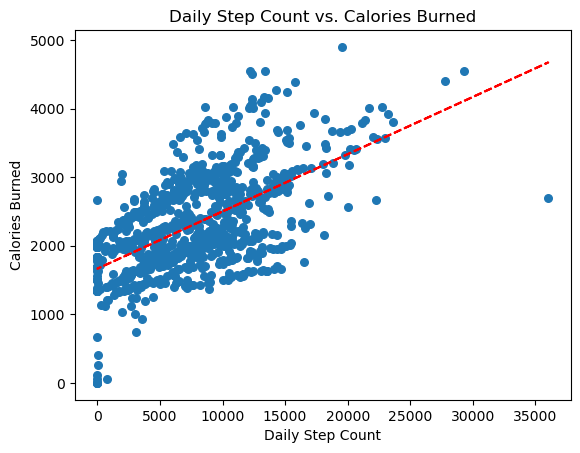

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot of daily calorie burn against daily step count
plt.scatter(df['TotalSteps'], df['Calories'], s=30)
plt.xlabel('Daily Step Count')
plt.ylabel('Calories Burned')
plt.title('Daily Step Count vs. Calories Burned')

# Fit a polynomial to the data and plot it as a line
z = np.polyfit(df['TotalSteps'], df['Calories'], 1)
p = np.poly1d(z)
plt.plot(df['TotalSteps'], p(df['TotalSteps']), "r--")

# Show the plot
plt.show()


### QUESTION 4

How much time do users spend in sedentary activity, and how can we encourage more movement and reduce sedentary behavior?

Average daily sedentary time: 991.21 minutes
Average daily very active time: 21.16 minutes


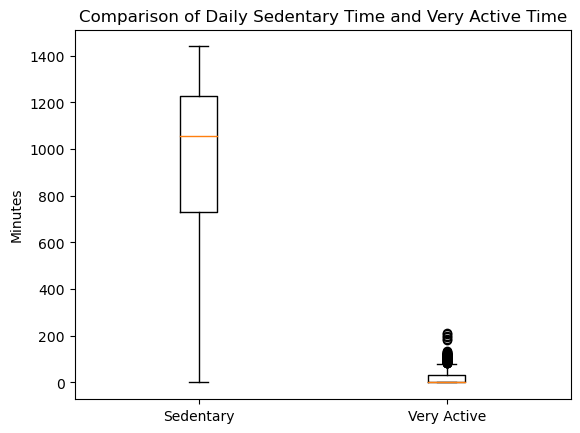

In [45]:
import matplotlib.pyplot as plt

# Calculate the average daily sedentary time in minutes and very active time in minutes
avg_sedentary = df['SedentaryMinutes'].mean()
avg_very_active = df['VeryActiveMinutes'].mean()

# Print the average daily sedentary time and very active time
print("Average daily sedentary time: {:.2f} minutes".format(avg_sedentary))
print("Average daily very active time: {:.2f} minutes".format(avg_very_active))

# Create a box plot of daily sedentary time and very active time
plt.boxplot([df['SedentaryMinutes'], df['VeryActiveMinutes']], labels=['Sedentary', 'Very Active'])
plt.ylabel('Minutes')
plt.title('Comparison of Daily Sedentary Time and Very Active Time')

# Show the plot
plt.show()


Average daily sedentary time: 991.21 minutes


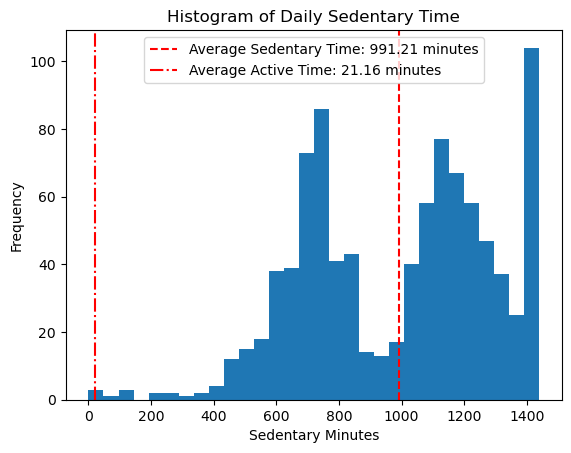

In [46]:
import matplotlib.pyplot as plt

# Calculate the average daily sedentary time in minutes
avg_sedentary = df['SedentaryMinutes'].mean()
avg_very_active = df['VeryActiveMinutes'].mean()

# Print the average daily sedentary time
print("Average daily sedentary time: {:.2f} minutes".format(avg_sedentary))

# Create a histogram of daily sedentary time
plt.hist(df['SedentaryMinutes'], bins=30)
plt.xlabel('Sedentary Minutes')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Sedentary Time')

# Add a vertical line for the average daily sedentary time
plt.axvline(x=avg_sedentary, color='r', linestyle='--', label='Average Sedentary Time: {:.2f} minutes'.format(avg_sedentary))

# Add a vertical line for the average daily sedentary time
plt.axvline(x=avg_very_active, color='r', linestyle='dashdot', label='Average Active Time: {:.2f} minutes'.format(avg_very_active))


# Add a legend
plt.legend()

# Show the plot
plt.show()


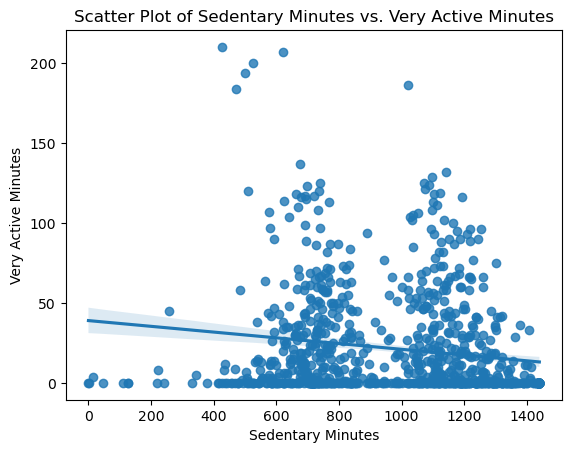

In [47]:
import seaborn as sns

# Create a scatter plot of sedentary minutes versus active minutes
sns.regplot(x='SedentaryMinutes', y='VeryActiveMinutes', data=df)

# Set axis labels and title
plt.xlabel('Sedentary Minutes')
plt.ylabel('Very Active Minutes')
plt.title('Scatter Plot of Sedentary Minutes vs. Very Active Minutes')

# Show the plot
plt.show()


### QUESTION 5

How do users who engage in more very active minutes compare in terms of daily step count, calorie burn, and other health metrics, and how can we incentivize more users to engage in these types of activities?

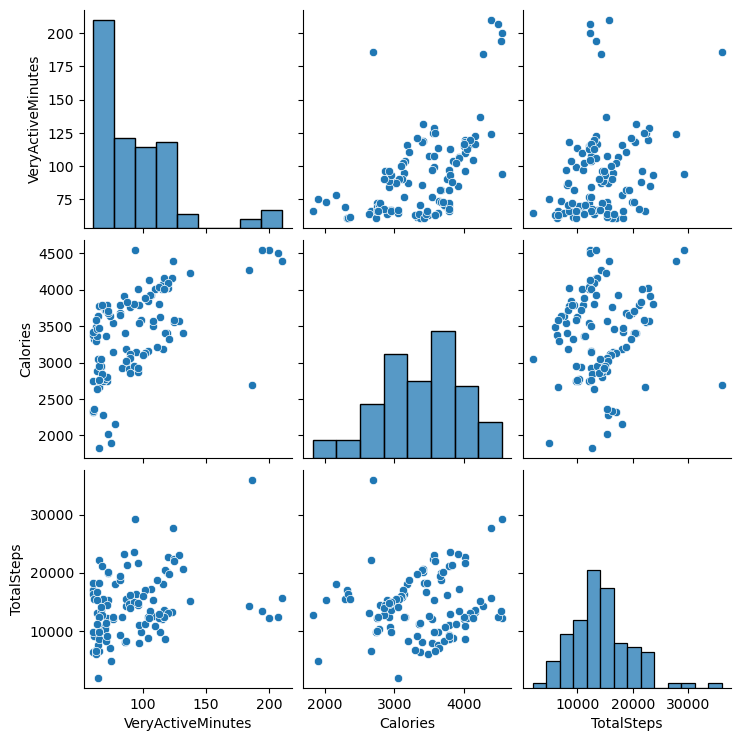

In [48]:
import seaborn as sns

# Create a subset of the data for users with more than 60 VeryActiveMinutes per day
highly_active_users = df[df['VeryActiveMinutes'] > 60]

# Select variables for the scatter matrix plot
variables = ['VeryActiveMinutes', 'Calories', 'TotalSteps']

# Create the scatter matrix plot
sns.pairplot(highly_active_users[variables])

# Show the plot
plt.show()


This creates a scatter matrix plot that shows the relationships between the variables 'VeryActiveMinutes', 'Calories', 'TotalSteps' for users who have more than 60 VeryActiveMinutes per day. 

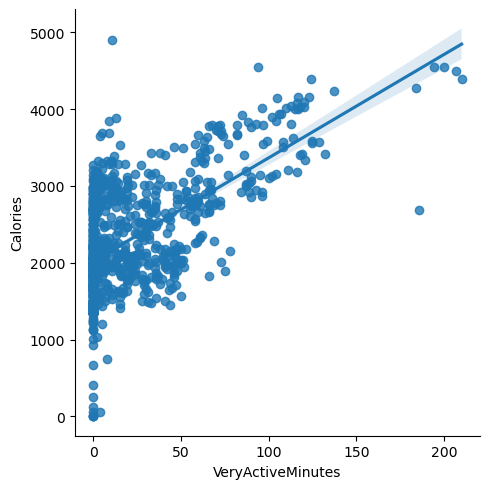

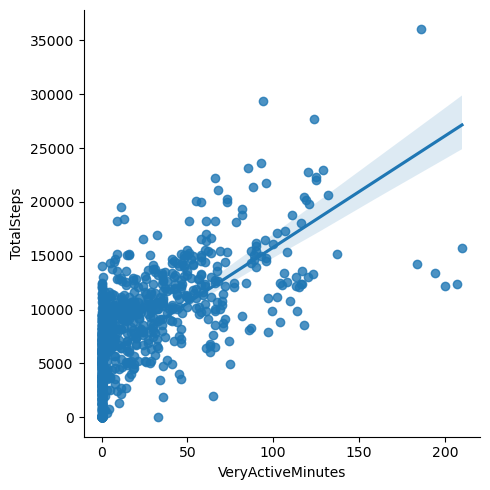

In [49]:
import seaborn as sns

# Create scatter plots with regression lines for VeryActiveMinutes vs other health metrics
sns.lmplot(x='VeryActiveMinutes', y='Calories', data=df)
sns.lmplot(x='VeryActiveMinutes', y='TotalSteps', data=df)

# Show the plots
plt.show()


There are several ways we can incentivize users to engage in more very active activities. Here are a few ideas:

Gamification: We can implement a points-based system that rewards users for achieving certain milestones or engaging in more very active activities. Users can earn badges, levels, or even tangible rewards for their achievements.

Social support: We can create a community or social network where users can connect with each other, share their progress, and encourage each other to engage in more very active activities. This can create a sense of accountability and motivation to stay active.

Challenges: We can create challenges or competitions that encourage users to engage in more very active activities. These challenges can be individual or team-based, and can be time-limited or ongoing.

Personalization: We can provide personalized recommendations and tips based on each user's activity level and goals. This can help users identify areas where they can improve and provide them with the motivation and tools they need to engage in more very active activities.

Education: We can provide educational content that emphasizes the health benefits of very active activities and the importance of regular physical activity. This can help users understand the value of engaging in more very active activities and motivate them to make it a part of their daily routine.

### QUESTION 6
What is the average daily usage time of our smartwatch, and how can we improve customer satisfaction and retention based on this data?

Average daily usage time: 1218.75 minutes


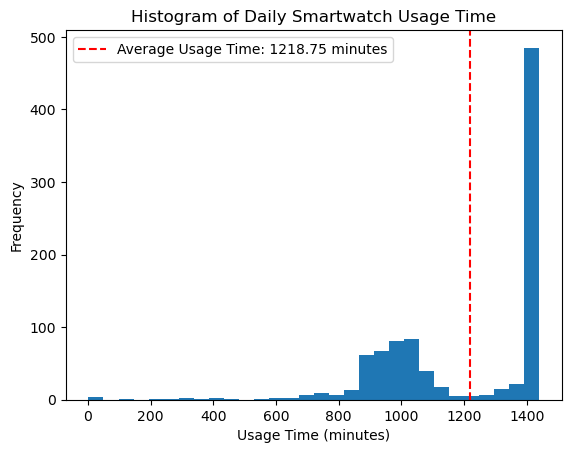

In [50]:
import matplotlib.pyplot as plt

# Calculate the average daily usage time in minutes
avg_usage = df['TotalMinutes'].mean()

# Print the average daily usage time
print("Average daily usage time: {:.2f} minutes".format(avg_usage))

# Create a histogram of daily usage time
plt.hist(df['TotalMinutes'], bins=30)
plt.xlabel('Usage Time (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Smartwatch Usage Time')

# Add a vertical line for the average daily usage time
plt.axvline(x=avg_usage, color='r', linestyle='--', label='Average Usage Time: {:.2f} minutes'.format(avg_usage))

# Add a legend
plt.legend()

# Show the plot
plt.show()
